## Data Wrangling - II

### 1. Dealing with missing values

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

In [67]:
df = pd.read_csv("StudentsPerformance_modified.csv")

In [68]:
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
5,female,group B,associate's degree,standard,none,71,83.0,78.0
6,female,group B,some college,standard,completed,88,95.0,92.0
7,male,group B,some college,free/reduced,none,40,43.0,39.0
8,male,group D,high school,free/reduced,completed,64,64.0,67.0
9,female,group B,high school,free/reduced,none,38,60.0,50.0


In [69]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [70]:
df['math score'] = pd.to_numeric(df['math score'], errors='coerce')

In [71]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [72]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [73]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                      True
reading score                   True
writing score                   True
dtype: bool

In [74]:
mean_values = df.mean()
mean_values

/tmp/ipykernel_3140/133585990.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_values = df.mean()


math score       66.323929
reading score    68.008048
writing score    69.487386
dtype: float64

In [75]:
numeric_cols = [col for col in df.columns if (df[col].dtype == 'float' or df[col].dtype == 'int')]
numeric_cols

['math score', 'reading score', 'writing score']

In [76]:
for i in range(len(numeric_cols)):
    df[numeric_cols[i]].fillna(round(mean_values[i]), inplace=True)

In [77]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [78]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

### 2. Dealing with outliers

In [79]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

In [80]:
# Scan for outliers using IQR
for col in numeric_columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = df[~df[col].between(lower_bound, upper_bound)]
    
    # Print outliers if any
    if len(outliers) > 0:
        print(f"Outliers detected in column '{col}':")
        print(outliers)
        df = df.drop(outliers.index)
    else:
        print(f"No outliers detected in column '{col}'.")
        
    
    print()    
    print("------------------------------------------------------------")
    print()

Outliers detected in column 'math score':
     gender race/ethnicity parental level of education         lunch  \
59   female        group C            some high school  free/reduced   
91     male        group C                 high school  free/reduced   
145  female        group C                some college  free/reduced   
327    male        group A                some college  free/reduced   
338  female        group B            some high school  free/reduced   
363  female        group D            some high school  free/reduced   
420  female        group C          associate's degree  free/reduced   
431  female        group C                 high school      standard   
456  female        group D           bachelor's degree      standard   
466  female        group D          associate's degree  free/reduced   
474  female        group B          associate's degree      standard   
787  female        group B                some college      standard   
842  female        gro

### 3. Applying data transformation

In [81]:
# skewness of all numeric columns
skewness = df.skew(axis=0, skipna=True)
print(skewness)

math score      -0.005428
reading score   -0.093828
writing score   -0.107861
dtype: float64


/tmp/ipykernel_3140/1427750965.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  skewness = df.skew(axis=0, skipna=True)


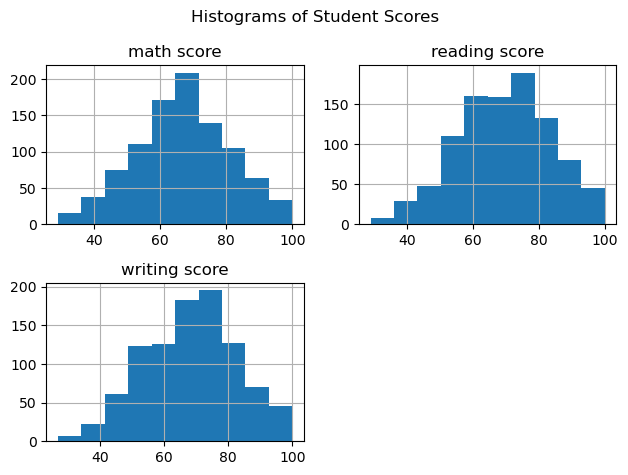

In [84]:
# histograms for original values

df.hist(bins=10, layout=(2, 2))
plt.xlabel("Score Value")
plt.ylabel("Frequency")
plt.suptitle("Histograms of Student Scores")
plt.tight_layout()
plt.show()

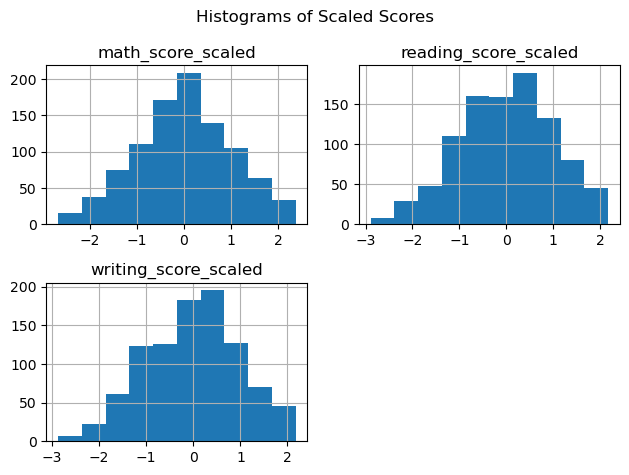

In [93]:
# standardization

df_scaled = df.copy()
df_scaled["math_score_scaled"] = (df_scaled["math score"] - df_scaled["math score"].mean()) / df_scaled["math score"].std()
df_scaled["reading_score_scaled"] = (df_scaled["reading score"] - df_scaled["reading score"].mean()) / df_scaled["reading score"].std()
df_scaled["writing_score_scaled"] = (df_scaled["writing score"] - df_scaled["writing score"].mean()) / df_scaled["writing score"].std()

In [ ]:
# histograms for original values

df_scaled.iloc[:,-3:].hist(bins=10, layout=(2, 2))
plt.xlabel("Scaled Score Value")
plt.ylabel("Frequency")
plt.suptitle("Histograms of Scaled Scores")
plt.tight_layout()
plt.show()